In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import sparse

In [2]:
from em import initialize, em, mle_em

# Image 1

In [3]:
A = np.load("simulated_large_A.npy")
x_flat = np.load("simulated_large_x.npy")
Ax = A@x_flat
y = np.random.poisson(Ax).reshape(len(A[:, 0]))
print("Image vector x is of shape {}".format(np.shape(x_flat)))
print("Mixing matrix A is of shape {}".format(np.shape(A)))
print("Observation matrix Y is of shape {}".format(np.shape(y)))

Image vector x is of shape (2500,)
Mixing matrix A is of shape (3108, 2500)
Observation matrix Y is of shape (3108,)


In [4]:
x_et, diff, mse, step = mle_em(200, A, y, x_true=x_flat, threshold=2.5)

step: 0, diff: 3849.9287650808537, mse: 1483.8243527252323
step: 1, diff: 238.33908290242906, mse: 1365.0637694233321
step: 2, diff: 145.8441386493241, mse: 1285.775780262796
step: 3, diff: 105.73634454470104, mse: 1222.753105260039
step: 4, diff: 84.9940936166021, mse: 1169.0092505338637
step: 5, diff: 72.43330896732355, mse: 1121.8206139257275
step: 6, diff: 63.75268239932436, mse: 1079.840243952727
step: 7, diff: 57.15497853371746, mse: 1042.2484661560015
step: 8, diff: 51.8197524135011, mse: 1008.4642865686968
step: 9, diff: 47.33296241312467, mse: 978.0341079980387
step: 10, diff: 43.463260246284406, mse: 950.5830579461299
step: 11, diff: 40.06891364343306, mse: 925.7908556542152
step: 12, diff: 37.056196302667495, mse: 903.3783762635084
step: 13, diff: 34.35924254815248, mse: 883.0993926253016
step: 14, diff: 31.929484897445604, mse: 864.7350679168055
step: 15, diff: 29.729702816696943, mse: 848.09002379342
step: 16, diff: 27.730462202968845, mse: 832.989365181432
step: 17, diff:

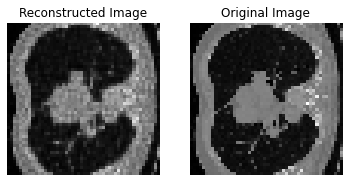

In [5]:
size = int(np.sqrt(A.shape[1]))

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(x_et.reshape(size, size), cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_flat.reshape(size, size), cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

# Image 2

In [3]:
A = sparse.load_npz('/nfs/stak/users/zhoutian/Downloads/simulated_large_A_20_50.npz')
x_flat = np.load("/nfs/stak/users/zhoutian/Downloads/simulated_large_x_20_50.npy")
Ax = A@x_flat
y = np.random.poisson(Ax)
print("Image vector x is of shape {}".format(np.shape(x_flat)))
print("Mixing matrix A is of shape {}".format(np.shape(A)))
print("Observation matrix Y is of shape {}".format(np.shape(y)))

Image vector x is of shape (2500,)
Mixing matrix A is of shape (2777, 2500)
Observation matrix Y is of shape (2777,)


In [6]:
def mc_run(n):
    etms = []
    for i in range(n):
        print(f"{i}th run start =>")
        y = y = np.random.poisson(Ax)
        x_et, diff, mse, step = mle_em(1000, A, y, x_true=x_flat, threshold=2, x_initial=None, sparse=True)
        etms.append([x_et, diff, mse, step])
    return etms

In [7]:
etms = mc_run(10)

0th run start =>
step: 0, diff: 3634.571329527515, mse: 3347.930132166292
step: 20, diff: 54.69999048218352, mse: 2674.094318279212
step: 40, diff: 20.531055829579547, mse: 2543.559780812949
step: 60, diff: 12.194833303286964, mse: 2466.213387760938
step: 80, diff: 8.415817520506222, mse: 2418.7864182876688
step: 100, diff: 6.387301063227513, mse: 2386.411420463734
step: 120, diff: 5.1807691438857475, mse: 2362.5947535871605
step: 140, diff: 4.391696156239869, mse: 2344.2767548147694
step: 160, diff: 3.831362076524968, mse: 2329.837617879438
step: 180, diff: 3.4078667717228095, mse: 2318.304529032021
step: 200, diff: 3.0734864341700177, mse: 2309.0277111826517
step: 220, diff: 2.8013321007308014, mse: 2301.5406849873093
step: 240, diff: 2.574953820711406, mse: 2295.493966182864
step: 260, diff: 2.383542382330417, mse: 2290.6192557247855
step: 280, diff: 2.2195804996307498, mse: 2286.7074241429227
step: 300, diff: 2.077611879718805, mse: 2283.5936073786484
1th run start =>
step: 0, diff

In [13]:
x_aver = np.mean([e[0] for e in etms ], axis=0)

In [14]:
x_aver

array([112.61630754, 150.40308926, 245.56907365, ..., 111.88822054,
       123.6858849 , 125.4410671 ])

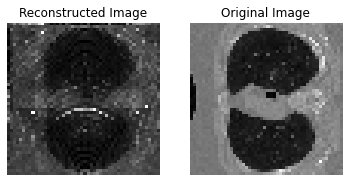

In [15]:
size = int(np.sqrt(A.shape[1]))

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(x_aver.reshape(size, size), cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_flat.reshape(size, size), cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

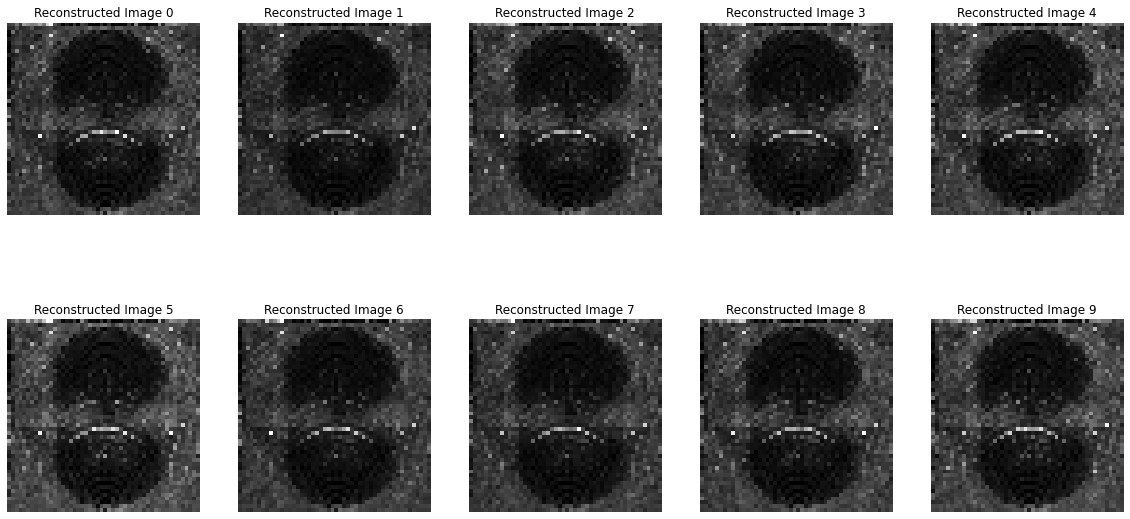

In [24]:
fig = plt.figure()
fig.set_size_inches(20,10)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(etms[i][0].reshape(size, size), cmap='gray')
    plt.title(f'Reconstructed Image {i}')
    plt.axis('off')

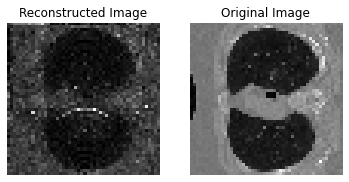

In [11]:
size = int(np.sqrt(A.shape[1]))

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(x_et.reshape(size, size), cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_flat.reshape(size, size), cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()